<a href="https://colab.research.google.com/github/giuseppemartino26/Semantic-SAM/blob/main/Evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import os
from statistics import mean
from itertools import chain
import numpy as np

# Inizializza una lista per memorizzare le medie di "iou_sem" per tutti gli oggetti
iou_sem_list = []
iou_sem_sam_list = []
dice_sem_list = []
dice_sem_sam_list = []
m_iou_sem_list = []
m_iou_sem_sam_list = []

low_iou_sem = {}
low_iou_sem_sam = {}
low_dice_sem = {}
low_dice_sem_sam = {}
threshold = 0.2


path_folder = '/content/drive/MyDrive/SEAI_project/metriche'
for nome_file in os.listdir(path_folder):

  # Leggi il file JSON
  with open(path_folder + '/' +nome_file, 'r') as f:
      data = json.load(f)

  # Itera su ogni oggetto nel dizionario
  for key in data:
      object_data = data[key]

      # Estrai i valori di "iou_sem" per l'oggetto corrente
      iou_sem_value = [d['iou_sem'] for d in object_data if 'iou_sem' in d]
      iou_sem_sam_value = [d['iou_sem_sam'] for d in object_data if 'iou_sem_sam' in d]
      dice_sem_value = [d['dice_sem'] for d in object_data if 'dice_sem' in d]
      dice_sem_sam_value = [d['dice_sem_sam'] for d in object_data if 'dice_sem_sam' in d]
      m_iou_sem_value = [d['m_iou_sem'] for d in object_data if 'm_iou_sem' in d]
      m_iou_sem_sam_value = [d['m_iou_sem_sam'] for d in object_data if 'm_iou_sem_sam' in d]

      # Aggiungi il valore alla lista
      iou_sem_list.append(iou_sem_value)
      iou_sem_sam_list.append(iou_sem_sam_value)
      dice_sem_list.append(dice_sem_value)
      dice_sem_sam_list.append(dice_sem_sam_value)
      m_iou_sem_list.append(m_iou_sem_value)
      m_iou_sem_sam_list.append(m_iou_sem_sam_value)

      if iou_sem_value[0] < threshold:
        low_iou_sem[key] = iou_sem_value

      if iou_sem_sam_value[0] < threshold:
        low_iou_sem_sam[key] = iou_sem_sam_value

      if dice_sem_value[0] < threshold:
        low_dice_sem[key] = dice_sem_value

      if dice_sem_sam_value[0] < threshold:
        low_dice_sem_sam[key] = dice_sem_sam_value


#converto le liste in numpy array
iou_sem_list = np.array(iou_sem_list).flatten()
iou_sem_sam_list = np.array(iou_sem_sam_list).flatten()
dice_sem_list = np.array(dice_sem_list).flatten()
dice_sem_sam_list = np.array(dice_sem_sam_list).flatten()
m_iou_sem_list = np.array(m_iou_sem_list).flatten()
m_iou_sem_sam_list = np.array(m_iou_sem_sam_list).flatten()

iou_sem_mean = np.mean(iou_sem_list)
iou_sem_sam_mean = np.mean(iou_sem_sam_list)
dice_sem_mean = np.mean(dice_sem_list)
dice_sem_sam_mean = np.mean(dice_sem_sam_list)
m_iou_sem_mean = np.mean(m_iou_sem_list)
m_iou_sem_sam_mean = np.mean(m_iou_sem_sam_list)

print(f"IOU media - segmentazione semantica: {iou_sem_mean}  dev standard: {np.std(iou_sem_list)}  errore standard: {np.std(iou_sem_list)/ np.sqrt(len(iou_sem_list))}")
print(f"IOU media - semantic SAM: {iou_sem_sam_mean}  dev standard: {np.std(iou_sem_sam_list)}  errore standard: {np.std(iou_sem_sam_list)/ np.sqrt(len(iou_sem_sam_list))}")
print(f"DICE media - segmentazione semantica: {dice_sem_mean}  dev standard: {np.std(dice_sem_list)}  errore standard: {np.std(dice_sem_list)/ np.sqrt(len(dice_sem_list))}")
print(f"DICE media - semantic SAM: {dice_sem_sam_mean}  dev standard: {np.std(dice_sem_sam_list)}  errore standard: {np.std(dice_sem_sam_list)/ np.sqrt(len(dice_sem_sam_list))}")
print(f"m_IOU media - segmentazione semantica: {m_iou_sem_mean}  dev standard: {np.std(m_iou_sem_list)}  errore standard: {np.std(m_iou_sem_list)/ np.sqrt(len(m_iou_sem_list))}")
print(f"m_IOU media - semantic SAM: {m_iou_sem_sam_mean}  dev standard: {np.std(m_iou_sem_sam_list)}  errore standard: {np.std(m_iou_sem_sam_list)/ np.sqrt(len(m_iou_sem_sam_list))}")

IOU media - segmentazione semantica: 0.6460381584544144  dev standard: 0.2716842921961004  errore standard: 0.01087607603180085
IOU media - semantic SAM: 0.6673196873936365  dev standard: 0.2850451733419078  errore standard: 0.011410939339572684
DICE media - segmentazione semantica: 0.733907129850624  dev standard: 0.2613299665294209  errore standard: 0.010461571268575347
DICE media - semantic SAM: 0.7473635778742206  dev standard: 0.2762875922059206  errore standard: 0.011060355514796711
m_IOU media - segmentazione semantica: 0.6920447827035275  dev standard: 0.24128388244596882  errore standard: 0.009659085659749165
m_IOU media - semantic SAM: 0.7425394114409402  dev standard: 0.24241733054068904  errore standard: 0.009704459897459525


In [ ]:
print(f"Numero di immagini considerate per la media: {len(iou_sem_list)}")

Numero di immagini considerate per la media: 624


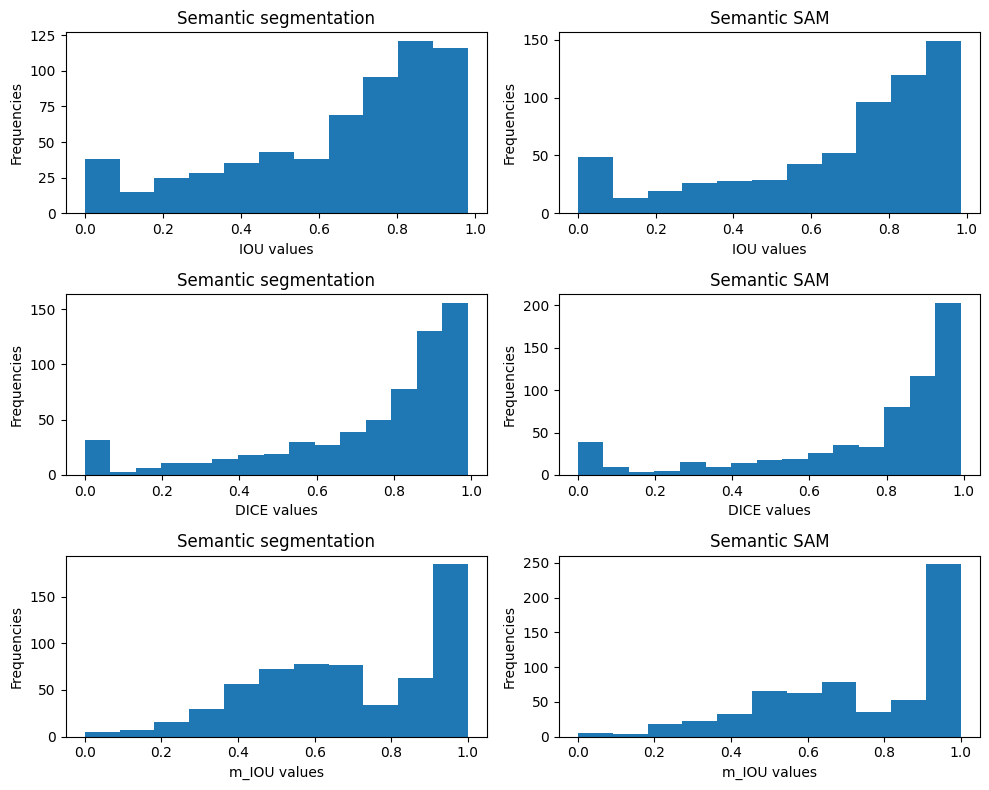

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creazione dei sottoplot
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Plot 1
axs[0, 0].hist(iou_sem_list, bins='auto')
axs[0, 0].set_title('Semantic segmentation')
axs[0, 0].set_xlabel('IOU values')
axs[0, 0].set_ylabel('Frequencies')

# Plot 2
axs[0, 1].hist(iou_sem_sam_list, bins='auto')
axs[0, 1].set_title('Semantic SAM')
axs[0, 1].set_xlabel('IOU values')
axs[0, 1].set_ylabel('Frequencies')

# Plot 3
axs[1, 0].hist(dice_sem_list, bins='auto')
axs[1, 0].set_title('Semantic segmentation')
axs[1, 0].set_xlabel('DICE values')
axs[1, 0].set_ylabel('Frequencies')

# Plot 4
axs[1, 1].hist(dice_sem_sam_list, bins='auto')
axs[1, 1].set_title('Semantic SAM')
axs[1, 1].set_xlabel('DICE values')
axs[1, 1].set_ylabel('Frequencies')

# Plot 5
axs[2, 0].hist(m_iou_sem_list, bins='auto')
axs[2, 0].set_title('Semantic segmentation')
axs[2, 0].set_xlabel('m_IOU values')
axs[2, 0].set_ylabel('Frequencies')

# Plot 6
axs[2, 1].hist(m_iou_sem_sam_list, bins='auto')
axs[2, 1].set_title('Semantic SAM')
axs[2, 1].set_xlabel('m_IOU values')
axs[2, 1].set_ylabel('Frequencies')


# Spaziatura tra i sottoplot
plt.tight_layout()

# Visualizzazione del grafico
plt.show()
